args, idk = getopt.getopt(sys.argv[1:],"f:e:d:t:o:m:c:l:a:",["folder=","exclude=",'depth=','filetypes=','output=', 'mode=','csv=','columns=','show='])


In [104]:
%run -i audiodb -f "F:\Stuff\Documents\Учеба\Python\Новая папка\mp2022_224-321_python-nikishev-i-o\sounds" -m "update" -e "F:\Stuff\Documents\Учеба\Python\Новая папка\mp2022_224-321_python-nikishev-i-o\sounds\исключ"  -d 2

Начинаем
Подключаемся к базе данных
Смотрим файлы


9it [02:11, 14.58s/it]

Записываем изменения в базу данных.
Операция завершена.


In [2]:
%run -i audiodb --csv="csv.csv" --columns "filename, size"

Начинаем
Подключаемся к базе данных
Записывается .csv файл csv.csv


In [8]:
%run -i audiodb --show "SELECT COUNT(*) FROM audiofiles"

Начинаем
Подключаемся к базе данных
+----------+
| COUNT(*) |
+----------+
|   426    |
+----------+


In [9]:
%run -i audiodb --show "SELECT filename, size FROM audiofiles ORDER BY size DESC LIMIT 10"

Начинаем
Подключаемся к базе данных
+--------------------------------------------------+-----------+
|                     filename                     |    size   |
+--------------------------------------------------+-----------+
|        Bee Recording Devine 96k-24bit.wav        | 108288730 |
|               Burning Embers4.wav                |  63587434 |
|                 f1 f3 audio1.wav                 |  62587826 |
|                 Snow Samples.aif                 |  37044570 |
|            bells full TALreverb.flac             |  30269848 |
|     bells full reverb lowdiff transient.flac     |  24374559 |
|              bells full autom.flac               |  24151604 |
| phenylacetate DIST AND COMPRESSOR RERELASASE.mp3 |  7398196  |
|                future selves.mp3                 |  6988211  |
|              Snares for export.wav               |  6583002  |
+--------------------------------------------------+-----------+


In [10]:
%run -i audiodb --show "SELECT filename, duration FROM audiofiles WHERE format_name='mp3' ORDER BY duration DESC LIMIT 10"

Начинаем
Подключаемся к базе данных
+--------------------------------------------------+------------+
|                     filename                     |  duration  |
+--------------------------------------------------+------------+
|                  f2 sound2.mp3                   | 349.701224 |
|      15 Sorting Algorithms in 6 Minutes.mp3      | 349.701224 |
|                 f1 f1 sound1.mp3                 | 245.472653 |
|                  f2 sound1.mp3                   | 229.407347 |
|                    sound2.mp3                    |  184.872   |
| phenylacetate DIST AND COMPRESSOR RERELASASE.mp3 |  184.824   |
|                future selves.mp3                 |   174.6    |
|                another stuff.mp3                 | 129.12325  |
|                 f1 f1 sound2.mp3                 | 45.740408  |
|            Microwave Sound Effect.mp3            | 45.426939  |
+--------------------------------------------------+------------+


In [55]:
%run -i audiodb --play "Part1 piano no reverb.flac"

Начинаем
Подключаемся к базе данных
Проигрывается превью Part1 piano no reverb.flac


In [24]:
%run -i audiodb --show "SELECT filename, TAG_title FROM audiofiles WHERE TAG_artist='test'"

Начинаем
Подключаемся к базе данных
+------------------+-----------+
|     filename     | TAG_title |
+------------------+-----------+
|    sound1.mp3    |  testname |
| f1 f1 sound1.mp3 | testname2 |
+------------------+-----------+


In [26]:
import audiodb as au

Начинаем
option --ip not recognized
Подключаемся к базе данных


In [50]:
files=au.get("SELECT filename, preview FROM audiofiles ORDER BY probe_score DESC LIMIT 10")
import numpy as np
for i in files:
    try: audio,samplerate=au.audio2numpy(i[1]) 
    except:continue
    print(f'{i[0]} - средняя громкость: {round(np.average(np.absolute(audio)), 5)}; смещение: {round(np.average(audio),5)}')


sound3.flac - средняя громкость: 0.39253; смещение: 0.00073
f1 sound2.flac - средняя громкость: 0.00451; смещение: 0.00015
Snow Samples.aif - средняя громкость: 0.09561; смещение: 3e-05
bells full reverb lowdiff transient.flac - средняя громкость: 0.02112; смещение: 5e-05
bells full autom.flac - средняя громкость: 0.02803; смещение: -0.00011
Full piano.flac - средняя громкость: 0.08326; смещение: -2e-05
texture rev.flac - средняя громкость: 0.11854; смещение: 0.00014
bells full TALreverb.flac - средняя громкость: 0.04408; смещение: 1e-05
Part1 piano no reverb.flac - средняя громкость: 0.12054; смещение: 5e-05
f1 sound1.wav - средняя громкость: 0.04083; смещение: -0.00132


In [56]:
%run -i audiodb --csv="pandas.csv" --columns "filename, format_name, sample_rate, bit_rate, channels, duration,  probe_score, size"
import pandas as pd
dataset=pd.read_csv('pandas.csv')
dataset.corr(numeric_only=True)

Начинаем
Подключаемся к базе данных
Записывается .csv файл pandas.csv


,sample_rate,bit_rate,channels,duration,probe_score,size
sample_rate,1.000000,0.255207,0.329203,0.160143,-0.043625,0.462287
bit_rate,0.255207,1.000000,-0.029736,0.097796,0.054520,0.340801
channels,0.329203,-0.029736,1.000000,0.008481,-0.046921,-0.036510
duration,0.160143,0.097796,0.008481,1.000000,-0.546040,0.628107
probe_score,-0.043625,0.054520,-0.046921,-0.546040,1.000000,-0.054755
size,0.462287,0.340801,-0.036510,0.628107,-0.054755,1.000000


Начинаем
Подключаемся к базе данных
Записывается .csv файл pandas.csv


<AxesSubplot: xlabel='bit_rate', ylabel='size'>

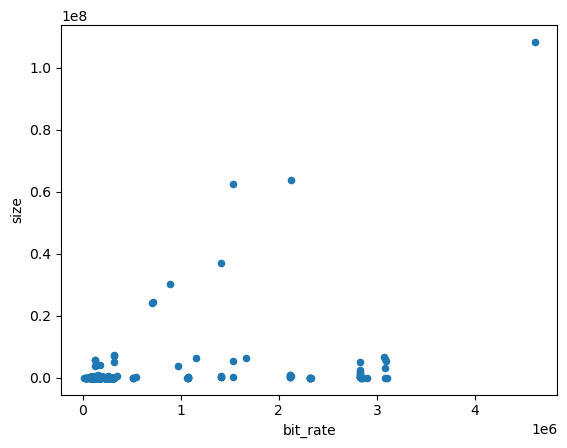

In [57]:
%run -i audiodb --csv="pandas.csv" --columns "filename, format_name, sample_rate, bit_rate, channels, duration,  probe_score, size"
import pandas as pd
dataset=pd.read_csv('pandas.csv')
dataset.corr(numeric_only=True)
dataset.plot(kind = 'scatter', x = 'bit_rate', y = 'size')

Начинаем
Подключаемся к базе данных
Записывается .csv файл pandas.csv


<AxesSubplot: ylabel='Density'>

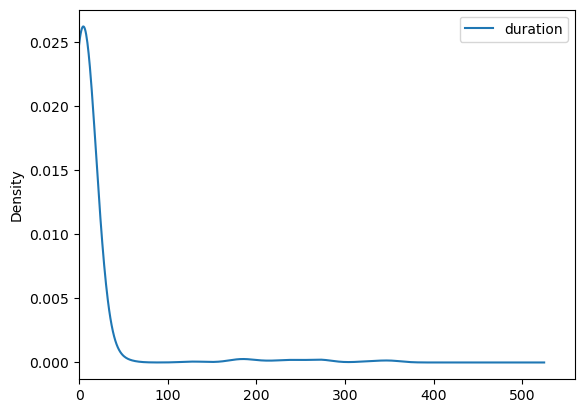

In [58]:
%run -i audiodb --csv="pandas.csv" --columns "duration"
import pandas as pd
dataset=pd.read_csv('pandas.csv')
dataset.plot.kde(xlim=0)

Начинаем
Подключаемся к базе данных
Записывается .csv файл matplotlib.csv


<function matplotlib.pyplot.show(close=None, block=None)>

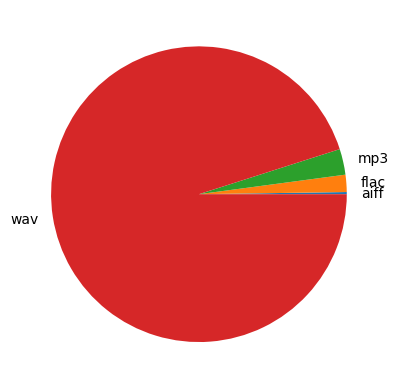

In [59]:
%run -i audiodb --csv="matplotlib.csv" --columns "format_name"
import matplotlib.pyplot as plt, csv, numpy as np
with open('matplotlib.csv', newline='') as csvf:
    data=list(i[0] for i in list(csv.reader(csvf, delimiter=' ', quotechar='|')))[1:]
values, counts = np.unique(data, return_counts=True)
plt.pie(counts, labels=values)
plt.show

Начинаем
Подключаемся к базе данных
Записывается .csv файл pandas.csv


<AxesSubplot: >

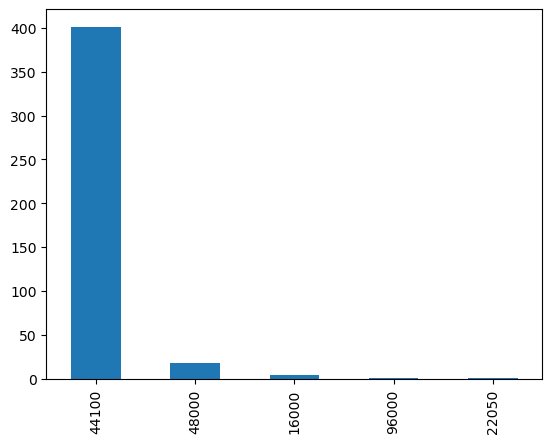

In [103]:
%run -i audiodb --csv="pandas.csv" --columns "sample_rate"
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('pandas.csv')
pd.value_counts(dataset['sample_rate']).plot.bar()
